In [103]:
import os
import re
import sys
import nltk
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from joblib import dump, load
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential,Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding

In [104]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [105]:
for i in range(len(df['Category'].unique())):
    print(df['Category'].unique()[i])

Data Science
HR
Advocate
Arts
Web Designing
Mechanical Engineer
Sales
Health and fitness
Civil Engineer
Java Developer
Business Analyst
SAP Developer
Automation Testing
Electrical Engineering
Operations Manager
Python Developer
DevOps Engineer
Network Security Engineer
PMO
Database
Hadoop
ETL Developer
DotNet Developer
Blockchain
Testing


<Axes: xlabel='count', ylabel='Category'>

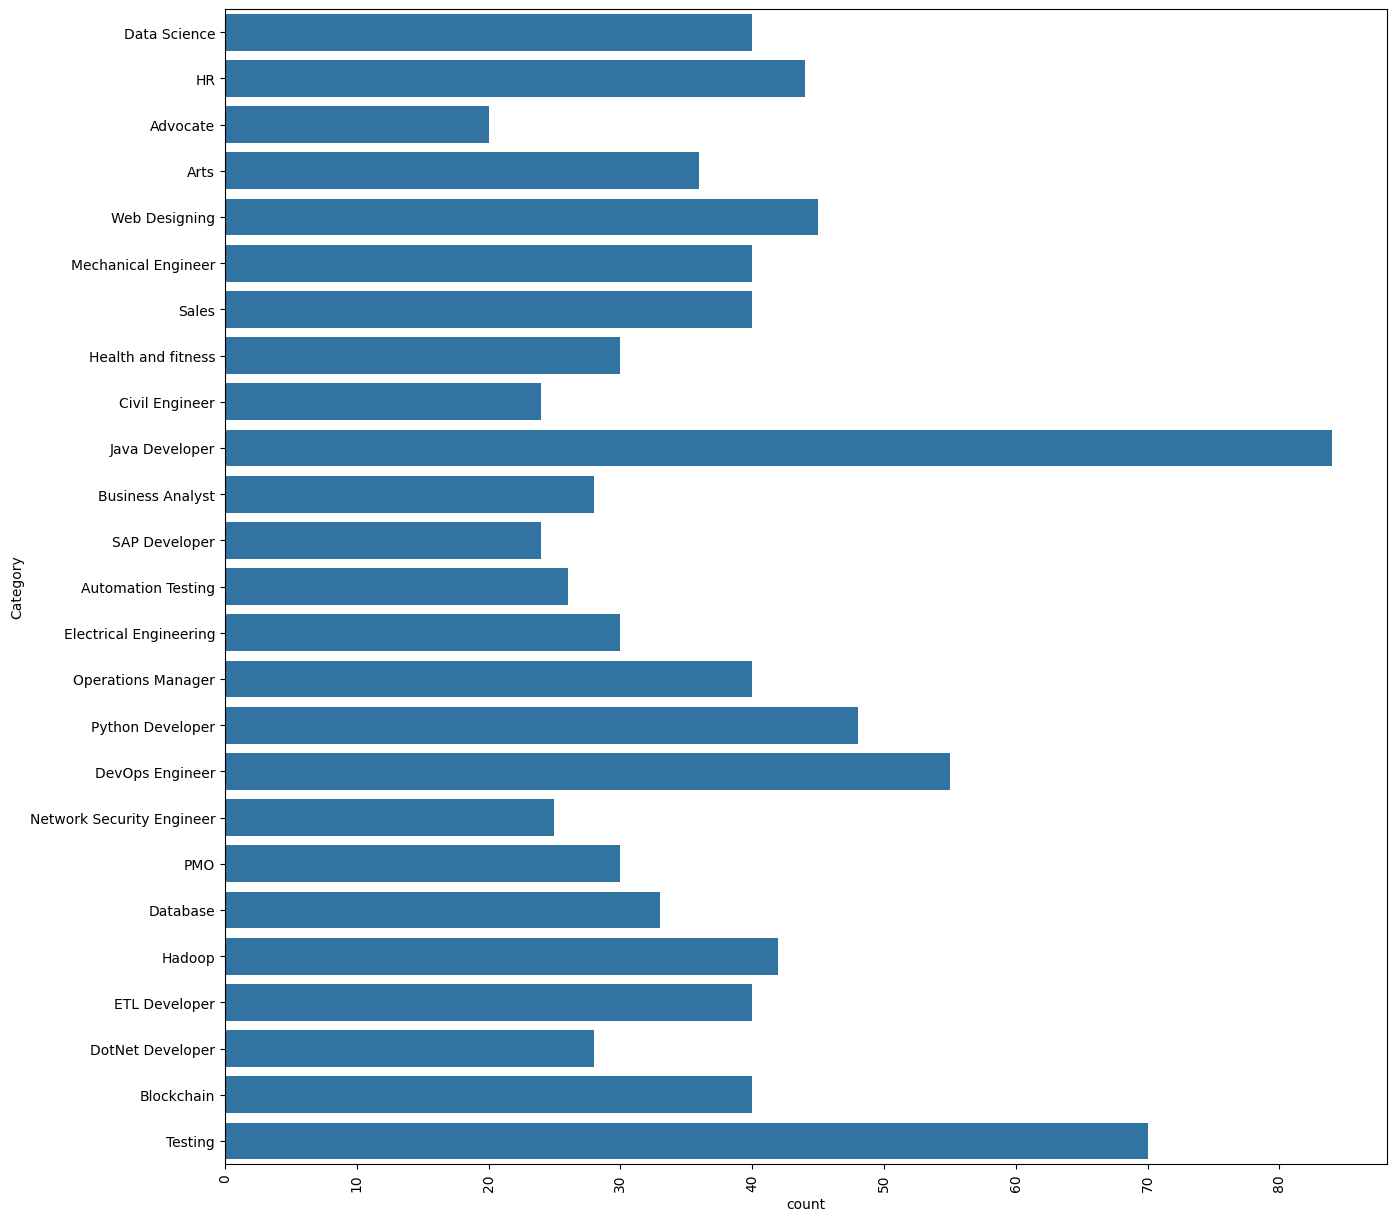

In [106]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [107]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
for label, cmap in zip(df['Category'].unique(), a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    print(text)

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [108]:
df['Resume'] = df['Resume'].apply(lambda x:x.lower())
for i in range(len(df)):
    lw=[]
    for j in df['Resume'][i].split():
        if len(j)>=3:
            lw.append(j)
    df['Resume'][i]=" ".join(lw)
ps = list(";?.:!,")
df['Resume'] = df['Resume']

for p in ps:
    df['Resume'] = df['Resume'].str.replace(p, '')

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Resume'][i]=" ".join(lw)
<ipython-input-108-2ad1371618d5>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment i

In [109]:
df['Resume'] = df['Resume'].str.replace("    ", " ")
df['Resume'] = df['Resume'].str.replace('"', '')
df['Resume'] = df['Resume'].apply(lambda x: x.replace('\t', ' '))
df['Resume'] = df['Resume'].str.replace("'s", "")
df['Resume'] = df['Resume'].apply(lambda x: x.replace('\n', ' '))

In [110]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [111]:
wl = WordNetLemmatizer()
nr = len(df)
lis = []
for r in range(0, nr):
    ll = []
    t = df.loc[r]['Resume']
    tw = str(t).split(" ")
    for w in tw:
        ll.append(wl.lemmatize(w, pos="v"))
    lt = " ".join(ll)
    lis.append(lt)

In [112]:
df['Resume'] = lis

In [113]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
sw = list(stopwords.words('english'))
for s in sw:
    rs = r"\b" + s + r"\b"
    df['Resume'] = df['Resume'].str.replace(rs, '')

In [115]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r','Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr']
for label, cmap in zip(df['Category'].unique(), a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    print(text)

skills program languages python (pandas numpy scipy scikit-learn matplotlib) sql java javascript/jquery machine learn regression svm naã¯ve bay knn random forest decision tree boost techniques cluster analysis word embed sentiment analysis natural language process dimensionality reduction topic model (lda nmf) pca neural net database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open and understand deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript- exprience months jquery- exprience months python- exprience monthscompany detail company ernst young llp description fraud investigations and dispute service assurance technology assist review tar (technology assist review) assist accelerate the review process and run analytics and generate report

In [116]:
c = LabelEncoder()
df['Category'] = c.fit_transform(df['Category'])
le_name_mapping = dict(zip( c.transform(c.classes_),c.classes_))
print(le_name_mapping)

{0: 'Advocate', 1: 'Arts', 2: 'Automation Testing', 3: 'Blockchain', 4: 'Business Analyst', 5: 'Civil Engineer', 6: 'Data Science', 7: 'Database', 8: 'DevOps Engineer', 9: 'DotNet Developer', 10: 'ETL Developer', 11: 'Electrical Engineering', 12: 'HR', 13: 'Hadoop', 14: 'Health and fitness', 15: 'Java Developer', 16: 'Mechanical Engineer', 17: 'Network Security Engineer', 18: 'Operations Manager', 19: 'PMO', 20: 'Python Developer', 21: 'SAP Developer', 22: 'Sales', 23: 'Testing', 24: 'Web Designing'}


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
cv = TfidfVectorizer(max_features=20000)
X = cv.fit_transform(df['Resume'])
y = df['Category']

smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, stratify=y_res, random_state=42
)

In [118]:
print(X_train.shape)
print(X_test.shape)

(1575, 6762)
(525, 6762)


In [119]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.

In [126]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.9 MB/s eta 0:00:00


In [127]:
import PyPDF2

# Read the uploaded file
uploaded_file = next(iter(uploaded.keys()))  # Get the first uploaded file

with open(uploaded_file, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    text = ""

    # Extract text from each page
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        text += page.extract_text()

# Print the extracted text
print(text)


Harsh  Adhikari  
harshadhikari023@gmail.com  | +91 8875750844  
 
EDUCATION   
Bangalore Institute  of Technology  Bangalore  
B.E. Computer  Science  Dec 2020  - May 2024  
Delhi  Public  School  Udaipur  
Senior  Secondary  Mar 2020  
Percentage:  93.4 % 
Delhi  Public  School  Udaipur  
Secondary  Mar 2018  
Percentage:  89.6 % 
 
EXPERIENCE  
 
Godrej  Infotech  | Associate  Technical  Consultant  Bangalore  | July  2024  – 
 Worked  on Microsoft  Dynamics  365 F&O  and understood  the ERP  systems  
 
Akiyam  solutions  | Game  Developer  Intern  Bangalore  | Jan 2023  - May  2023  
• Responsible  for level  design  for an upcoming  game  using  Unreal  Engine.  
• Conducted  product  (game)  testing,  identifying  and reporting  errors,  and actively  participated  in the 
correction  process.  
• Partnered  with  team  members  to learn  best practices  in software  design  
 
Sparks  Foundation | Data  Science  & Business  Analytics  Intern  Bangalore |  Nov 2022  - Dec 2022 

In [128]:
res = text
resa = cv.transform([res])
print(le_name_mapping[int(clf.predict(resa))])

Data Science


<ipython-input-128-0bc52292c5d2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(le_name_mapping[int(clf.predict(resa))])
